In [96]:
# Imports
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import datetime, timedelta

from sklearn.cluster import KMeans, MiniBatchKMeans
from sklearn.metrics import silhouette_score

In [ ]:
# Load the data and preprocess
data_path = f'{os.getcwd()}/city_bike_NYC/202401-citibike-tripdata/202401-citibike-tripdata_2.csv'
df = pd.read_csv(data_path)

t2_df = df.dropna(subset=['start_lat', 'start_lng', 'end_lat', 'end_lng'])
data = t2_df[['start_lat', 'start_lng', 'end_lat', 'end_lng']].values

/var/folders/4x/h7p4kfcj2ggcgfnp461t8n0r0000gn/T/ipykernel_29065/4209597424.py:3: DtypeWarning: Columns (5,7) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(data_path)


<class 'str'>


In [79]:
# Sample data to speed it up
sample_df = df.sample(n=100000, random_state=42)
sample_df = sample_df.dropna(subset=['start_lat', 'start_lng', 'end_lat', 'end_lng'])
sample_data = sample_df[['start_lat', 'start_lng', 'end_lat', 'end_lng']].values

[Elbow] Running MiniBatchKMeans for k=2 ...
[Elbow] Running MiniBatchKMeans for k=3 ...
[Elbow] Running MiniBatchKMeans for k=4 ...
[Elbow] Running MiniBatchKMeans for k=5 ...
[Elbow] Running MiniBatchKMeans for k=6 ...
[Elbow] Running MiniBatchKMeans for k=7 ...
[Elbow] Running MiniBatchKMeans for k=8 ...
[Elbow] Running MiniBatchKMeans for k=9 ...
[Elbow] Running MiniBatchKMeans for k=10 ...
[Elbow] Running MiniBatchKMeans for k=11 ...
[Elbow] Running MiniBatchKMeans for k=12 ...
[Elbow] Running MiniBatchKMeans for k=13 ...
[Elbow] Running MiniBatchKMeans for k=14 ...


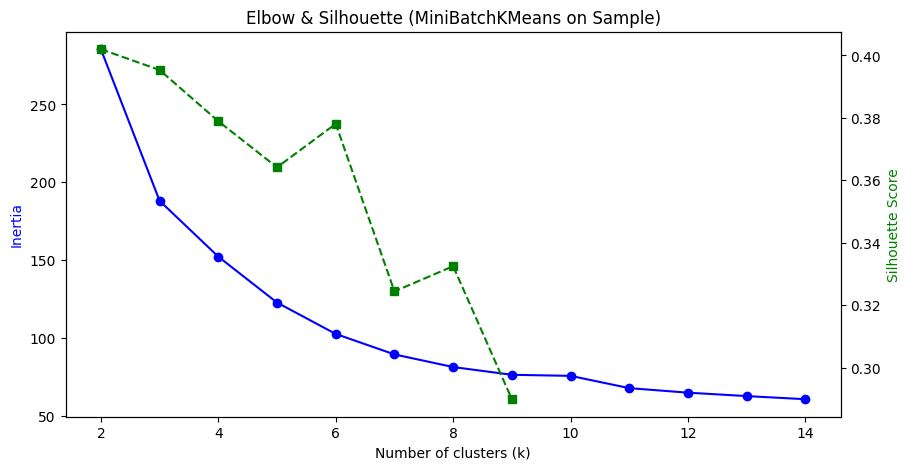

In [80]:
# !! ChatGPT Generated Code !!
# --- Step 1: Elbow + Silhouette Test using MiniBatchKMeans ---
inertias, sil_scores = [], []
K_range = range(2, 15)

for k in K_range:
    print(f"[Elbow] Running MiniBatchKMeans for k={k} ...")
    kmeans = MiniBatchKMeans(
        n_clusters=k,
        init='k-means++',
        batch_size=10000,
        n_init=5,
        max_iter=100,
        random_state=42
    )
    kmeans.fit(sample_data)
    inertias.append(kmeans.inertia_)

    if k < 10:
        idx = np.random.choice(sample_data.shape[0], 5000, replace=False)
        sil = silhouette_score(sample_data[idx], kmeans.predict(sample_data[idx]))
        sil_scores.append(sil)
    else:
        sil_scores.append(np.nan)

# --- Step 2: Plot Elbow & Silhouette ---
fig, ax1 = plt.subplots(figsize=(10, 5))
ax1.plot(K_range, inertias, 'o-', color='blue', label='Inertia (Elbow)')
ax1.set_xlabel('Number of clusters (k)')
ax1.set_ylabel('Inertia', color='blue')

ax2 = ax1.twinx()
ax2.plot(K_range, sil_scores, 's--', color='green', label='Silhouette')
ax2.set_ylabel('Silhouette Score', color='green')

plt.title('Elbow & Silhouette (MiniBatchKMeans on Sample)')
plt.show()


In [ ]:
# Fit both KMeans models according to "elbow" in the plot
K = 6

vanilla_kmeans = KMeans(n_clusters=K, init='random', n_init=5, random_state=42)
vanilla_kmeans.fit(data)

special_kmeans = KMeans(n_clusters=K, init='k-means++', n_init=5, random_state=42)
special_kmeans.fit(data)

print(vanilla_kmeans.cluster_centers_)
print(special_kmeans.cluster_centers_)

[[ 40.7319414  -73.99247358  40.73201469 -73.99255046]
 [ 40.75784507 -73.91696342  40.75783076 -73.91719452]
 [ 40.67963333 -73.97792388  40.67987844 -73.97742233]
 [ 40.70557411 -73.94345541  40.70585384 -73.9436557 ]
 [ 40.824792   -73.9284422   40.82513374 -73.9281821 ]
 [ 40.76950307 -73.97241633  40.76963689 -73.97227469]]
[[ 40.8247795  -73.92845767  40.8251213  -73.92819628]
 [ 40.76948612 -73.97242651  40.76962038 -73.97228594]
 [ 40.67962634 -73.97788585  40.67987404 -73.97738898]
 [ 40.73193066 -73.99247766  40.73200322 -73.99255379]
 [ 40.70563139 -73.94344927  40.70590807 -73.94364272]
 [ 40.75786124 -73.91693672  40.7578488  -73.91717382]]


In [82]:
# !! ChatGPT Generated Code !!
# Sample for testing data
eval_sample_size = 50000
idx = np.random.choice(len(data), eval_sample_size, replace=False)
samples_subset = data[idx]

# Make predictions using the models
vanilla_labels = vanilla_kmeans.predict(samples_subset)
special_labels = special_kmeans.predict(samples_subset)

# Calculate and print the silhouette scores
vanilla_sil = silhouette_score(samples_subset, vanilla_labels)
special_sil = silhouette_score(samples_subset, special_labels)

print("\n=== Cluster Performance Summary ===")
print(f"Vanilla KMeans:  Inertia = {vanilla_kmeans.inertia_:.2f},  Silhouette = {vanilla_sil:.4f}")
print(f"K-Means++:       Inertia = {special_kmeans.inertia_:.2f},  Silhouette = {special_sil:.4f}")


=== Cluster Performance Summary ===
Vanilla KMeans:  Inertia = 980.39,  Silhouette = 0.3774
K-Means++:       Inertia = 980.40,  Silhouette = 0.3774


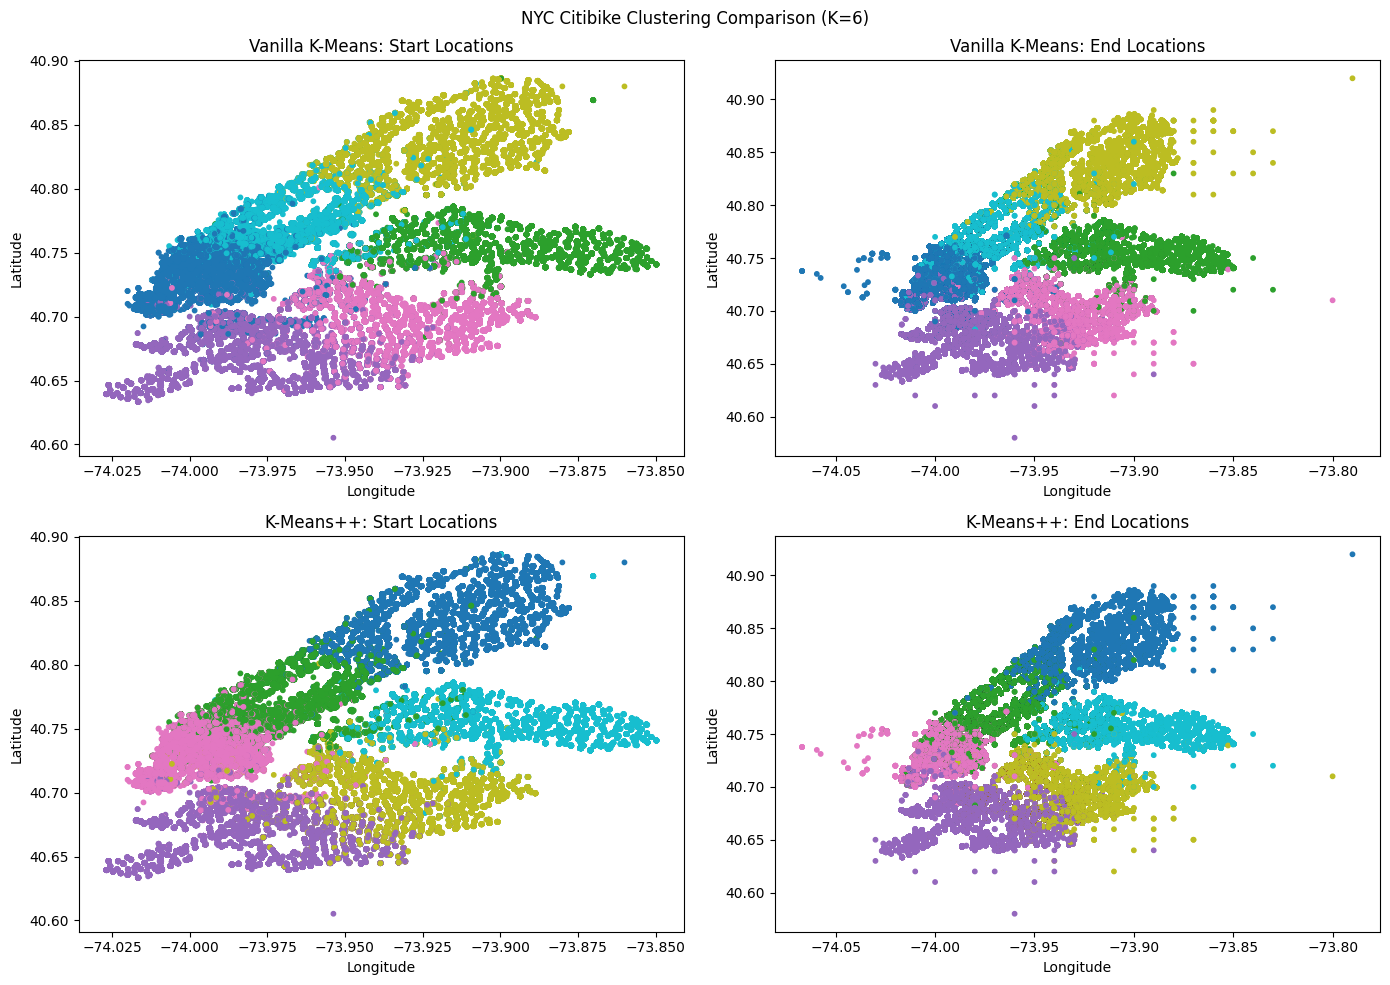

In [83]:
# !! ChatGPT Generated Code !!

# Predict cluster labels
labels_vanilla = vanilla_kmeans.labels_
labels_special = special_kmeans.labels_

# Plot comparison side-by-side
fig, axes = plt.subplots(2, 2, figsize=(14, 10))

# Vanilla K-Means
axes[0,0].scatter(t2_df['start_lng'], t2_df['start_lat'], c=labels_vanilla, s=10, cmap='tab10')
axes[0,0].set_title("Vanilla K-Means: Start Locations")
axes[0,0].set_xlabel("Longitude"); axes[0,0].set_ylabel("Latitude")

axes[0,1].scatter(t2_df['end_lng'], t2_df['end_lat'], c=labels_vanilla, s=10, cmap='tab10')
axes[0,1].set_title("Vanilla K-Means: End Locations")
axes[0,1].set_xlabel("Longitude"); axes[0,1].set_ylabel("Latitude")

# K-Means++
axes[1,0].scatter(t2_df['start_lng'], t2_df['start_lat'], c=labels_special, s=10, cmap='tab10')
axes[1,0].set_title("K-Means++: Start Locations")
axes[1,0].set_xlabel("Longitude"); axes[1,0].set_ylabel("Latitude")

axes[1,1].scatter(t2_df['end_lng'], t2_df['end_lat'], c=labels_special, s=10, cmap='tab10')
axes[1,1].set_title("K-Means++: End Locations")
axes[1,1].set_xlabel("Longitude"); axes[1,1].set_ylabel("Latitude")

plt.suptitle(f"NYC Citibike Clustering Comparison (K={K})")
plt.tight_layout()
plt.show()


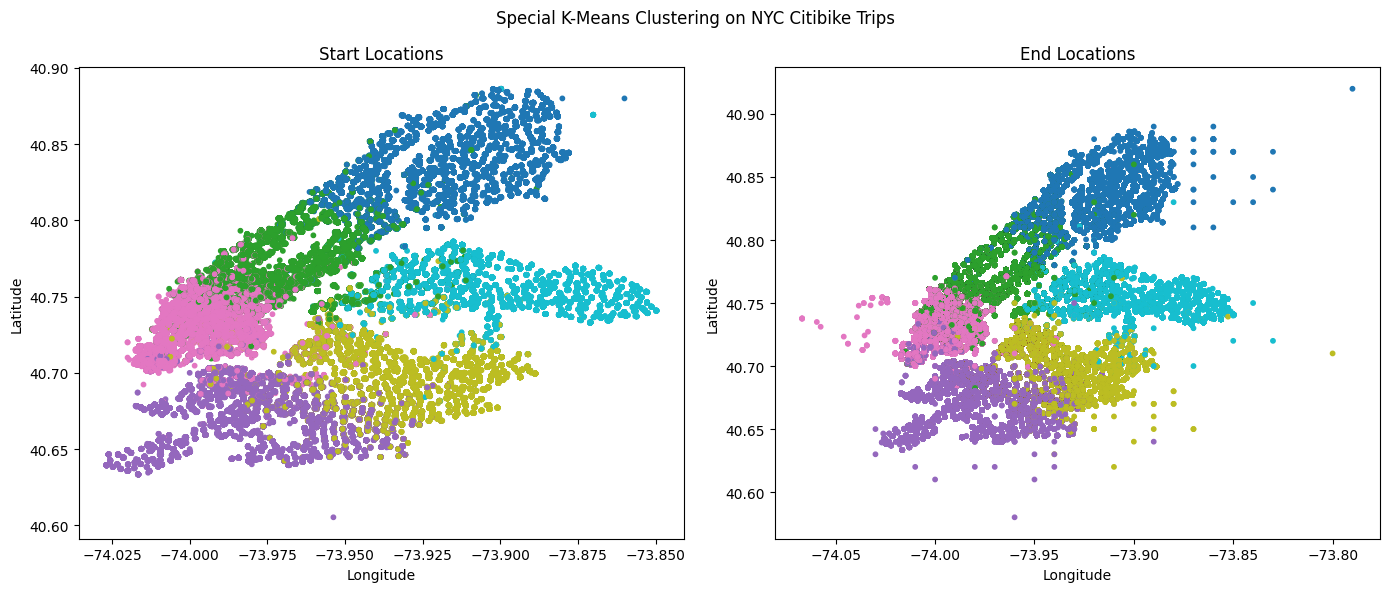

In [84]:
fig, axes = plt.subplots(1, 2, figsize=(14, 6))

axes[0].scatter(t2_df['start_lng'], t2_df['start_lat'], c=labels_special, s=10, cmap='tab10')
axes[0].set_title("Start Locations")
axes[0].set_xlabel("Longitude")
axes[0].set_ylabel("Latitude")

axes[1].scatter(t2_df['end_lng'], t2_df['end_lat'], c=labels_special, s=10, cmap='tab10')
axes[1].set_title("End Locations")
axes[1].set_xlabel("Longitude")
axes[1].set_ylabel("Latitude")

plt.suptitle("Special K-Means Clustering on NYC Citibike Trips")
plt.tight_layout()
plt.show()


In [85]:
print(f"Random Inertia: f{vanilla_kmeans.inertia_}")
print(f"K-means++ Inertia: f{special_kmeans.inertia_}")

Random Inertia: f980.3911719767591
K-means++ Inertia: f980.3953833321502


## BEGIN WORK ON PART C ##

In [ ]:
# Important columns: start_station_id, end_station_id, started_at, ended_at
df['started_at'] = pd.to_datetime(df['started_at'])
df['ended_at'] = pd.to_datetime(df['ended_at'])

df['start_hour'] = df['started_at'].dt.hour
df['end_hour'] = df['ended_at'].dt.hour

# !! ChatGPT Generated Code !!
start_counts = df.groupby(['start_station_id', 'start_hour']).size().unstack(fill_value=0)
end_counts = df.groupby(['end_station_id', 'end_hour']).size().unstack(fill_value=0)

for col in range(24):
    if col not in start_counts.columns:
        start_counts[col] = 0
    if col not in end_counts.columns:
        end_counts[col] = 0

station_hourly = start_counts.add(end_counts, fill_value=0).astype(int)
station_hourly = station_hourly.reindex(sorted(station_hourly.columns), axis=1)

print(station_hourly.shape)
print(station_hourly.head())

(4353, 24)
start_hour  0   1   2   3   4   5   6   7   ...  16  17  18  19  20  21  22  23
2733.03      0   0   1   0   0   0   0   1  ...   2   1   1   3   0   1   2   0
2782.02      1   0   0   0   0   0   0   0  ...   0   4   3   0   0   1   0   0
2821.05      0   0   1   0   0   0   0   0  ...   1   3   7   0   3   0   2   0
2832.03      0   0   0   0   0   0   0   0  ...   4   0   0   0   0   1   2   1
2861.02      0   0   0   0   0   0   0   0  ...   1   0   0   0   0   1   0   0

[5 rows x 24 columns]


In [118]:
station_vanilla_kmeans = KMeans(n_clusters=K, init='random', n_init=1, random_state=42)
station_vanilla_kmeans.fit(station_hourly)

station_special_kmeans = KMeans(n_clusters=K, init='k-means++', n_init=1, random_state=42)
station_special_kmeans.fit(station_hourly)

KMeans(n_clusters=6, n_init=1, random_state=42)

In [121]:
print(f"Random Inertia: \tf{station_vanilla_kmeans.inertia_}")
print(f"K-means++ Inertia: \tf{station_special_kmeans.inertia_}")

Random Inertia: 	f22203689.702324577
K-means++ Inertia: 	f22408739.554933175
